Introduction:


Summary of Results:

In [1]:
# import standard library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
import os
# function to load the datasets
def load_data(file_path,file_name):
    """
    Function to help load dataset given the path and the file name
    and returns the dataFrame
    """
    full_path = os.path.join(file_path,file_name)
    df = pd.read_csv(full_path,index_col=False)
    
    return df

In [38]:
# import the data
path = 'E:/development/DS/files/data/house-prices-advanced-regression-techniques/'
fileName = 'train.csv'

df = load_data(path,fileName)
df.drop('Id',axis=1,inplace=True)
df.head(2).T

,0,1
MSSubClass,60,20
MSZoning,RL,RL
LotFrontage,65,80
LotArea,8450,9600
Street,Pave,Pave
Alley,NaN,NaN
LotShape,Reg,Reg
LandContour,Lvl,Lvl
Utilities,AllPub,AllPub
LotConfig,Inside,FR2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [15]:
df.loc[:,['YearBuilt','YrSold','GarageYrBlt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
YearBuilt      1460 non-null int64
YrSold         1460 non-null int64
GarageYrBlt    1379 non-null float64
dtypes: float64(1), int64(2)
memory usage: 34.3 KB


In [6]:
cat_num=0

for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        cat_num+=1
        
cat_num,(df.shape[1]-cat_num)

(43, 38)

There are 43 categorical features out of 81. Rest of them i.e. 38 are numerical features.

In [6]:
missing_col = df.isnull().sum()[df.isnull().sum() >0]
missing_col

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
missing_col.index.values

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [9]:
len(missing_col.index)

19

There are 19 columns containing missing values which needs to be handled before feeding them into machine learning algorithms. We'll be doing data cleaning in the coming sections.

Now, let's look into the stats of the data.

In [10]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

Pandas describe method with include attribute lists stats for both numerical and categorical features. For numerical variables you can see count, mean, standard deviation, max value, min value and percentile (25%, 50%, 75%). Whereas, for categorical features you can see number of unique values, top category with frequency.

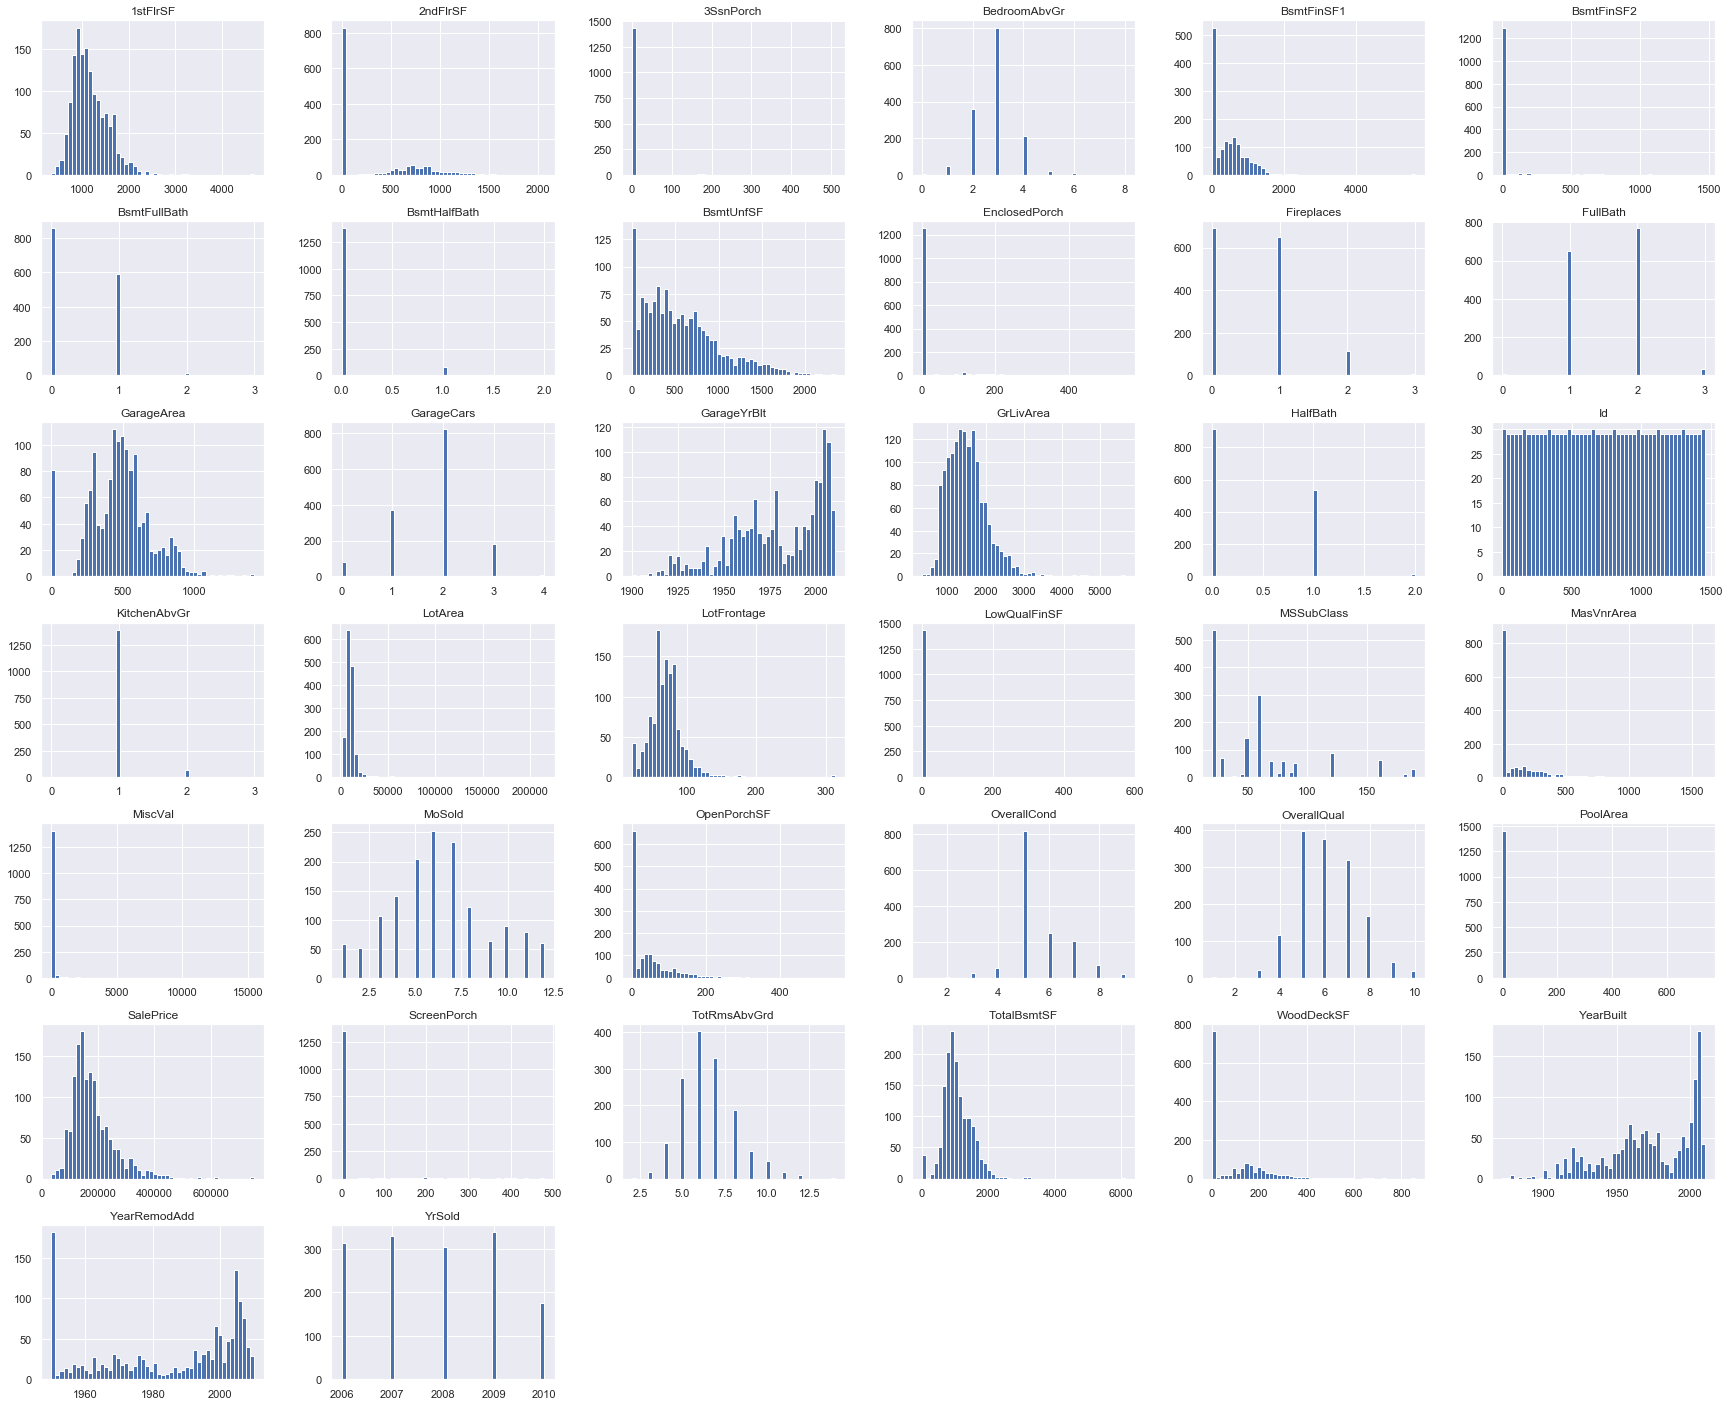

In [11]:
df.hist(bins=50, figsize=(30,25))
plt.show()

#### Prepare the data for Machine Learning Algorithms
###### Data Cleaning

In this section, we're going to clean the data, handling the missing values.

In [44]:
from sklearn.impute import SimpleImputer

def preprocess_data(df):
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            imputer_num = SimpleImputer(strategy='median')
            df[label] = imputer_num.fit_transform(df[[label]])
        else:
            imputer_cat = SimpleImputer(strategy='constant',
                                       fill_value='Not Av')
            df[label] = imputer_cat.fit_transform(df[[label]])
    return df

In [51]:
house_df = df.copy()
house_df.loc[:,['YearBuilt','GarageYrBlt','YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
YearBuilt      1460 non-null int64
GarageYrBlt    1379 non-null float64
YrSold         1460 non-null int64
dtypes: float64(1), int64(2)
memory usage: 34.3 KB


In [42]:
house_df.loc[39:51,
             ['YearBuilt','GarageYrBlt','YearRemodAdd']]

,YearBuilt,GarageYrBlt,YearRemodAdd
39,1955,NaN,1955
40,1965,1965.0,1965
41,1959,1959.0,1959
42,1983,1983.0,1983
43,1975,1977.0,1980
44,1959,1959.0,1959
45,2005,2005.0,2005
46,2003,2003.0,2003
47,2006,2006.0,2006
48,1920,NaN,2008


As you can see there are missing values related to GarageYrBlt which cannot be handling using statistical methods. Additionally, Garage year built date doesn't correlated to house built year or house remodel year date by looking through records above. So, in our case it can only be handled by removing those missig values rows. But in practice, there can be other solutions to it. Therefore, should find out the reason behind the issue and handle it accordingly if that feature carries the value for model prediction.

In [59]:
# removing the missing values from GarageYrBlt
house_df1 = house_df[house_df1['GarageYrBlt'].notna()].copy()
# handling the missing values
housing_final = preprocess_data(house_df1)

In [60]:
housing_final.to_csv('data/housing-data/housing_10_20.csv',
                    index=False)

#### Feature Selection for model performace

1. Removing constant features
2. Removing quasi-constant features
3. Removing duplicated features
4. Removing correlated features

And many more, let's see if these techniques have any significant effects on model performace for this particular case.

In [5]:
df_new = load_data('data/housing-data/','housing_10_20.csv')
df_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,Not Av,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Not Av,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,Not Av,Not Av,Not Av,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,Not Av,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,Not Av,Not Av,Not Av,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,Not Av,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,Not Av,Not Av,Not Av,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,Not Av,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,Not Av,Not Av,Not Av,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,Not Av,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,Not Av,Not Av,Not Av,0.0,12.0,2008.0,WD,Normal,250000.0


###### Encoding the ordinal variables for correlation

In [9]:
housing_df = df_new.copy()

In [10]:
def encode_ordinal(data,features,feauter_dict):

    for col in features:
        # mapping the columns with the ordinal dict
        data[col+'_cat'] = data[col].map(feauter_dict)
        # removing the old features
        data.drop(labels=[col],axis=1,inplace=True)
    
    return data

In [11]:
# dict to map ordinal to integer value
ord_1 = {"Ex":5,
         "Gd":4, 
        "TA":3,    
        "Fa":2,           
        "Po":1,
        "Not Av":0}

# ordinal columns with same categories
ordinal_cols =['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
               'GarageQual', 'GarageCond', 'PoolQC']

housing_df = encode_ordinal(housing_df,ordinal_cols,ord_1)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,HeatingQC_cat,KitchenQual_cat,FireplaceQu_cat,GarageQual_cat,GarageCond_cat,PoolQC_cat
0,60.0,RL,65.0,8450.0,Pave,Not Av,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,2.0,2008.0,WD,Normal,208500.0,4,3,4,3,5,4,0,3,3,0
1,20.0,RL,80.0,9600.0,Pave,Not Av,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,5.0,2007.0,WD,Normal,181500.0,3,3,4,3,5,3,3,3,3,0
2,60.0,RL,68.0,11250.0,Pave,Not Av,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,Y,0.0,42.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,9.0,2008.0,WD,Normal,223500.0,4,3,4,3,5,4,3,3,3,0
3,70.0,RL,60.0,9550.0,Pave,Not Av,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,Y,0.0,35.0,272.0,0.0,0.0,0.0,Not Av,Not Av,0.0,2.0,2006.0,WD,Abnorml,140000.0,3,3,3,4,4,4,4,3,3,0
4,60.0,RL,84.0,14260.0,Pave,Not Av,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,Y,192.0,84.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,12.0,2008.0,WD,Normal,250000.0,4,3,4,3,5,4,3,3,3,0


In [12]:
# another dict for ordinal mapping
ord2 = {'GLQ':6,
       'ALQ':5,
       'BLQ':4,
       'Rec':3,
       'LwQ':2,
       'Unf':1,
       'Not Av':0}

ordinal_cols_1 = ['BsmtFinType1','BsmtFinType2']

housing_df = encode_ordinal(housing_df,ordinal_cols_1,ord2)
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,HeatingQC_cat,KitchenQual_cat,FireplaceQu_cat,GarageQual_cat,GarageCond_cat,PoolQC_cat,BsmtFinType1_cat,BsmtFinType2_cat
0,60.0,RL,65.0,8450.0,Pave,Not Av,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,No,706.0,0.0,150.0,856.0,GasA,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,2.0,2008.0,WD,Normal,208500.0,4,3,4,3,5,4,0,3,3,0,6,1
1,20.0,RL,80.0,9600.0,Pave,Not Av,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,978.0,0.0,284.0,1262.0,GasA,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,5.0,2007.0,WD,Normal,181500.0,3,3,4,3,5,3,3,3,3,0,5,1
2,60.0,RL,68.0,11250.0,Pave,Not Av,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,Mn,486.0,0.0,434.0,920.0,GasA,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,Y,0.0,42.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,9.0,2008.0,WD,Normal,223500.0,4,3,4,3,5,4,3,3,3,0,6,1
3,70.0,RL,60.0,9550.0,Pave,Not Av,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,BrkTil,No,216.0,0.0,540.0,756.0,GasA,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,Y,0.0,35.0,272.0,0.0,0.0,0.0,Not Av,Not Av,0.0,2.0,2006.0,WD,Abnorml,140000.0,3,3,3,4,4,4,4,3,3,0,5,1
4,60.0,RL,84.0,14260.0,Pave,Not Av,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,PConc,Av,655.0,0.0,490.0,1145.0,GasA,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,Y,192.0,84.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,12.0,2008.0,WD,Normal,250000.0,4,3,4,3,5,4,3,3,3,0,6,1


In [13]:
# binary feature encoding
housing_df['CentralAir_cat'] = housing_df['CentralAir'].replace(
                                    {'Y':1,'N':0})
# remove the col
housing_df.drop(labels=['CentralAir'],axis=1,inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [15]:
X_train,X_test,y_train,y_test = train_test_split(
            housing_df.drop(labels=['SalePrice'],axis=1),
            housing_df['SalePrice'],
            test_size=0.2,
            random_state=42)

X_train.shape,X_test.shape

((1103, 79), (276, 79))

In [16]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

###### Remove constant features

In [17]:
# list for numerical features
housing_num = []
# list for categorical features
housing_cat = []

for label, content in X_train.items():
    
    if pd.api.types.is_numeric_dtype(content):
        #print(label)
        housing_num.append(label)
    else:
        housing_cat.append(label)

In [18]:
constant_num_features = [
    feat for feat in housing_num if X_train[feat].std() == 0
]

X_train.drop(labels=constant_num_features,axis=1,inplace=True)
X_test.drop(labels=constant_num_features,axis=1,inplace=True)

X_train.shape, X_test.shape

((1103, 79), (276, 79))

In [19]:
constant_cat_features = [
    feat for feat in housing_cat if X_train[feat].nunique() == 1]

X_train.drop(labels=constant_num_features,axis=1,inplace=True)
X_test.drop(labels=constant_num_features,axis=1,inplace=True)

X_train.shape, X_test.shape

((1103, 79), (276, 79))

This shows there a no constant features. That's actually good for base model that we built while ago.

###### Remove quasi-constant features

In [20]:
def remove_quasi_const_feat(data,threshold=0.998):

    # create an empyt list
    quasi_const = []

    for feature in data.columns:

        predominant = (data[feature].value_counts() / np.float(

            len(X_train))).sort_values(ascending=False).values[0]

        if predominant > threshold:

            quasi_const.append(feature)
            
    return quasi_const

In [21]:
quasi_constant_feature = remove_quasi_const_feat(X_train,0.998)
quasi_constant_feature

['Utilities']

In [20]:
X_train['Utilities'].value_counts(dropna=False)/len(X_train)

AllPub    1.0
Name: Utilities, dtype: float64

So, we find one feature- Utilities where 99.99% of the time AllPub appears in the data at threshold 0.998. If you change the threshold different values may appear.

In [21]:
X_train_basicfilter =X_train.drop(labels=quasi_constant_feature,
                                  axis=1)
X_test_basicfilter =X_test.drop(labels=quasi_constant_feature,
                             axis=1)

###### Remove correlated features

In [22]:
# function to remove correlated features
def correlation(data,threshold):
    col_corr = set()
    
    corr_matrix = data.corr()
    
    for i in range(len(corr_matrix.columns)):
        
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

corr_features = correlation(X_train,0.8)
print('Correlated features: ',len(set(corr_features)))

Correlated features:  6


There are 6 correlated features which can be dropped from the train and test sets.

In [23]:
X_train.drop(labels=corr_features,axis=1,inplace=True)
X_test.drop(labels=corr_features,axis=1,inplace=True)

X_train.shape, X_test.shape

((1103, 73), (276, 73))

###### Convert rest of the categorical features (Nominal)
Use oneHot encoding for the Nominal features. For this we can use pandas get_dummies and apply to the dataFrame.

In [26]:
housing_df_new = housing_df.copy()

In [27]:
# remove the basic filters and correlation features
housing_df_new.drop(labels =list(corr_features) + ['Utilities'],
               axis=1,inplace=True)

In [28]:
housing_df_new.shape,housing_df.shape

((1379, 73), (1379, 80))

Total of 7 features is eliminated using basic filter techniques from Feature selection.

In [29]:
features = housing_df_new.drop(labels=['SalePrice'],axis=1)
targets = housing_df_new['SalePrice']
features.shape, targets.shape

((1379, 72), (1379,))

In [31]:
cols_list = ['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown='ignore')

housing_cat_1hot = cat_encoder.fit_transform(
            features[cols_list]).toarray()
housing_cat_1hot.shape

(1379, 197)

In [33]:
# adding converted categorical features into the dataFrame
encode_df = pd.DataFrame(housing_cat_1hot)

# merge with the main dataFrame
features = features.join(encode_df)
features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,HeatingQC_cat,KitchenQual_cat,GarageQual_cat,GarageCond_cat,BsmtFinType1_cat,BsmtFinType2_cat,CentralAir_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196
0,60.0,RL,65.0,8450.0,Pave,Not Av,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,No,706.0,0.0,150.0,856.0,GasA,SBrkr,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Typ,0.0,Attchd,RFn,2.0,Y,0.0,61.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,2.0,2008.0,WD,Normal,4,3,4,3,5,4,3,3,6,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,RL,80.0,9600.0,Pave,Not Av,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,978.0,0.0,284.0,1262.0,GasA,SBrkr,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,Typ,1.0,Attchd,RFn,2.0,Y,298.0,0.0,0.0,0.0,0.0,0.0,Not Av,Not Av,0.0,5.0,2007.0,WD,Normal,3,3,4,3,5,3,3,3,5,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,RL,68.0,11250.0,Pave,Not Av,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,PConc,Mn,486.0,0.0,434.0,920.0,GasA,SBrkr,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Typ,1.0,Attchd,RFn,2

In [34]:
# drop the categorical variables now as they've been already
# converted into onehot encoding
features = features.drop(labels=cols_list,axis=1)
features.shape

(1379, 240)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(
            features,
            targets,
            test_size=0.2,
            random_state=42)

X_train.shape,X_test.shape 

((1103, 240), (276, 240))

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def rmse_of_log_pre_and_obs(y_test,y_preds):
    """
    Calculates root mean squared error between log of predicted and observed sale price
    """
    return np.sqrt(mean_squared_error(np.log(y_test),np.log(y_preds)))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    scores = { "Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_test,val_preds),
              "Training RMSE log": rmse_of_log_pre_and_obs(y_train,train_preds),
              "Valid RMSE Log": rmse_of_log_pre_and_obs(y_test,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Valid R^2": r2_score(y_test,val_preds)}
    
    return scores


def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=200, random_state=42)
    rf.fit(X_train, y_train)
    
    # return the model
    return rf

In [60]:
rf_model = run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

In [61]:
show_scores(rf_model)

{'Training MAE': 6497.8870444242975,
 'Valid MAE': 17683.295163043476,
 'Training RMSE log': 0.05706110732996547,
 'Valid RMSE Log': 0.13888252078054258,
 'Training R^2': 0.9799695564789447,
 'Valid R^2': 0.7944790642122391}

The model performed quit well compared to the our base model without basic filter feature selection.

##### Hyperparameter tuning with RandomizedSearchCV

In [65]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(50,500,10),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2),
           "max_features":[0.5,1,'sqrt','auto'],
          'bootstrap':[True,False]}

# instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=100,
                             cv=10,
                             verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 10.3min finished


Wall time: 10min 21s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [67]:
show_scores(rs_model)

{'Training MAE': 8203.663937119802,
 'Valid MAE': 17295.593719942462,
 'Training RMSE log': 0.06977917325561803,
 'Valid RMSE Log': 0.1384528451589939,
 'Training R^2': 0.9741374006771986,
 'Valid R^2': 0.8072934068855551}

In [68]:
rs_model.best_params_

{'n_estimators': 140,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': 10,
 'bootstrap': True}

###### Save the model

In [66]:
import joblib

filename = 'rf_rscv_10_20_2020.sav'

In [ ]:
# save the model to disk
joblib.dump(rf_random,filename)

In [24]:
# columns removed from train set before training the model
train_col_neg = quasi_constant_feature +['FireplaceQu',
                     'TotRmsAbvGrd',
                     'GarageArea',
                     '1stFlrSF',
                     'PoolQC',
                     'GarageYrBlt']

###### Fit the model on test data

In [39]:
housing_test = load_data(path,'test.csv')
housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [56]:
df_test = housing_test.copy()
df_test.drop(labels=['Id']+train_col_neg,axis=1,inplace=True)
len(df_test.columns)

72

In [57]:
df_test.loc[df_test['MasVnrType'] == "None","MasVnrType"]  = np.nan

In [58]:
housing_test_processed = preprocess_data(df_test)
housing_test_processed.isna().sum()[housing_test_processed.isna().sum()>0]

Series([], dtype: int64)

No missing values in test data.

In [59]:
ordinal_cols_1 = ['BsmtFinType1','BsmtFinType2']
ordinal_cols =['ExterQual','ExterCond','BsmtQual', 'BsmtCond', 
                 'HeatingQC', 'KitchenQual',
               'GarageQual', 'GarageCond']



housing_test_processed = encode_ordinal(housing_test_processed,
                                        ordinal_cols,ord_1)

housing_test_processed = encode_ordinal(housing_test_processed,
                                        ordinal_cols_1,ord2)

# binary feature encoding
housing_test_processed['CentralAir_cat'] = \
                housing_test_processed['CentralAir'].replace(
                                                    {'Y':1,'N':0})
# remove the col
housing_test_processed.drop(labels=['CentralAir'],
                            axis=1,inplace=True)

In [60]:
housing_test_processed.shape

(1459, 72)

In [61]:
housing_test_encode = cat_encoder.transform(
                    housing_test_processed[cols_list]).toarray()
housing_test_encode.shape

(1459, 197)

In [62]:
# adding converted categorical features into the dataFrame
encode_test_df = pd.DataFrame(housing_test_encode)

# merge with the main dataFrame
housing_test_processed = housing_test_processed.join(encode_test_df)
housing_test_processed.shape

(1459, 269)

In [63]:
# drop the categorical variables now as they've been already
# converted into onehot encoding
housing_test_processed = housing_test_processed.drop(
                                    labels=cols_list,
                                    axis=1)
housing_test_processed.shape

(1459, 240)

In [64]:
housing_test_processed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,ExterQual_cat,ExterCond_cat,BsmtQual_cat,BsmtCond_cat,HeatingQC_cat,KitchenQual_cat,GarageQual_cat,GarageCond_cat,BsmtFinType1_cat,BsmtFinType2_cat,CentralAir_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,3,3,3,3,3,3,3,3,3,2,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,3,3,3,3,3,4,3,3,5,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,2.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,3,3,4,3,4,3,3,3,6,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0

In [70]:
# Formatting the predictions according to Kaggle submission
def export_preds_toCSV(test_predictions,file_name):
    df_preds = pd.DataFrame()
    df_preds['Id'] = housing_test['Id']
    df_preds['SalePrice'] = np.array(test_predictions)
    
    # saving to csv file
    df_preds.to_csv(f'data/{file_name}.csv',index=False)

###### Load save model

In [67]:
loaded_model = joblib.load(filename)

###### Fit the test dataset

In [68]:
test_preds = loaded_model.predict(housing_test_processed)

In [101]:
housing_test['Id'].values

array([1461, 1462, 1463, ..., 2917, 2918, 2919], dtype=int64)

In [71]:
export_preds_toCSV(test_preds,'housing_pred2020_10_20')

In [72]:
df = pd.read_csv('data/housing_pred2020_10_20.csv')
df.head()

,Id,SalePrice
0,1461,124001.332167
1,1462,157113.482266
2,1463,185749.501191
3,1464,184041.939293
4,1465,200202.513447
